In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("Advertising.csv")

# Inspect the dataset
print(data.head())
print(data.describe())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [60]:
# Standardize predictors
scaler = StandardScaler()
predictors = ['TV', 'Radio', 'Newspaper']
data[predictors] = scaler.fit_transform(data[predictors])

In [61]:
# Add bias column
data['Bias'] = 1

# Split into predictors and response
X = data[['Bias', 'TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [62]:
# Initialize weights
def initialize_weights(n_features, seed=42):
    np.random.seed(seed)
    return np.zeros(n_features)

In [63]:
# Predict
def predict(X, weights):
    return np.dot(X, weights)

In [64]:
# Compute cost
def compute_cost(y_true, y_pred):
    m = len(y_true)
    return (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)

In [65]:
# Compute gradient
def compute_gradient(X, y_true, y_pred):
    m = len(y_true)
    return (1 / m) * np.dot(X.T, (y_pred - y_true))

In [66]:
# Update weights
def update_weights(weights, gradients, learning_rate):
    return weights - learning_rate * gradients

In [67]:
# Gradient descent
def grad_descent(X, y, weights, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        y_pred = predict(X, weights)
        cost = compute_cost(y, y_pred)
        gradients = compute_gradient(X, y, y_pred)
        weights = update_weights(weights, gradients, learning_rate)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return weights, cost_history

In [68]:
# Initialize weights
weights = initialize_weights(X_train.shape[1])

# Set learning rate and number of iterations
learning_rate = 0.01

iterations = 1000

# Run gradient descent
optimized_weights, cost_history = grad_descent(X_train.values, y_train.values, weights, learning_rate, iterations)

print("Optimized Weights:", optimized_weights)


Iteration 0: Cost = 112.5910
Iteration 100: Cost = 15.8501
Iteration 200: Cost = 3.3067
Iteration 300: Cost = 1.6527
Iteration 400: Cost = 1.4286
Iteration 500: Cost = 1.3967
Iteration 600: Cost = 1.3917
Iteration 700: Cost = 1.3907
Iteration 800: Cost = 1.3905
Iteration 900: Cost = 1.3905
Optimized Weights: [14.02422361  3.83784155  2.78818185  0.01967685]


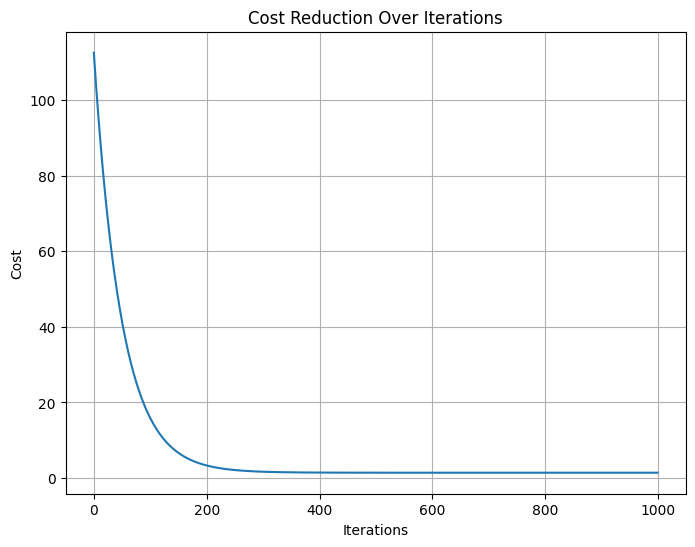

In [69]:
# Plot cost history
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.grid()
plt.show()


In [70]:

# Predict on test set
y_test_pred = predict(X_test.values, optimized_weights)

# Compute metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test MSE:", test_mse)
print("Test R2 Score:", test_r2)


Test MSE: 2.855048595258284
Test R2 Score: 0.9109977868204685


Iteration 0: Cost = 112.5910
Iteration 100: Cost = 92.0921
Iteration 200: Cost = 75.3830
Iteration 300: Cost = 61.7611
Iteration 400: Cost = 50.6545
Iteration 500: Cost = 41.5973
Iteration 600: Cost = 34.2104
Iteration 700: Cost = 28.1849
Iteration 800: Cost = 23.2692
Iteration 900: Cost = 19.2583
Iteration 0: Cost = 112.5910
Iteration 100: Cost = 15.8501
Iteration 200: Cost = 3.3067
Iteration 300: Cost = 1.6527
Iteration 400: Cost = 1.4286
Iteration 500: Cost = 1.3967
Iteration 600: Cost = 1.3917
Iteration 700: Cost = 1.3907
Iteration 800: Cost = 1.3905
Iteration 900: Cost = 1.3905
Iteration 0: Cost = 112.5910
Iteration 100: Cost = 1.3905
Iteration 200: Cost = 1.3905
Iteration 300: Cost = 1.3905
Iteration 400: Cost = 1.3905
Iteration 500: Cost = 1.3905
Iteration 600: Cost = 1.3905
Iteration 700: Cost = 1.3905
Iteration 800: Cost = 1.3905
Iteration 900: Cost = 1.3905
Iteration 0: Cost = 112.5910
Iteration 100: Cost = 1.3905
Iteration 200: Cost = 1.3905
Iteration 300: Cost = 1.3905
Iter

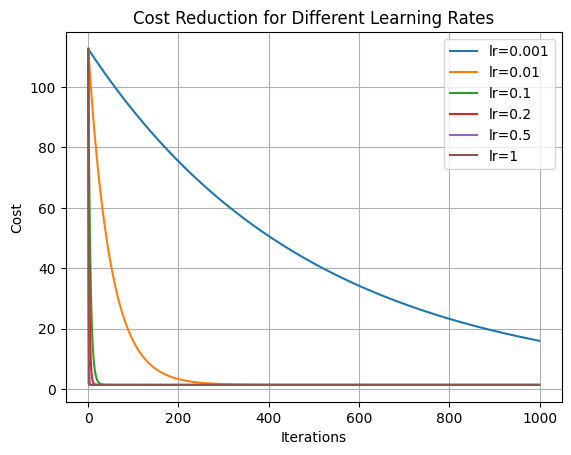

In [71]:
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.5, 1]

for lr in learning_rates:
    weights = initialize_weights(X_train.shape[1])  # Reset weights
    _, cost_history = grad_descent(X_train.values, y_train.values, weights, lr, 1000)
    plt.plot(range(len(cost_history)), cost_history, label=f'lr={lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()


This implementation shows how learning rates affect the cost across the iteration. This implies that the bigger the learrning rate, the steeper the cost function across the iteration. Additionaly, upon experimenting I found out that the model started to reach its global minimum somewhere between 0.01 to 0.1 learning rate with 1000 iterations.

Iteration 0: Cost = 112.5910
Iteration 100: Cost = 15.8501
Iteration 200: Cost = 3.3067
Iteration 300: Cost = 1.6527
Iteration 400: Cost = 1.4286
Iteration 500: Cost = 1.3967
Iteration 600: Cost = 1.3917
Iteration 700: Cost = 1.3907
Iteration 800: Cost = 1.3905
Iteration 900: Cost = 1.3905
Iteration 0: Cost = 101.7739
Iteration 100: Cost = 14.6224
Iteration 200: Cost = 3.1645
Iteration 300: Cost = 1.6361
Iteration 400: Cost = 1.4267
Iteration 500: Cost = 1.3964
Iteration 600: Cost = 1.3916
Iteration 700: Cost = 1.3907
Iteration 800: Cost = 1.3906
Iteration 900: Cost = 1.3905


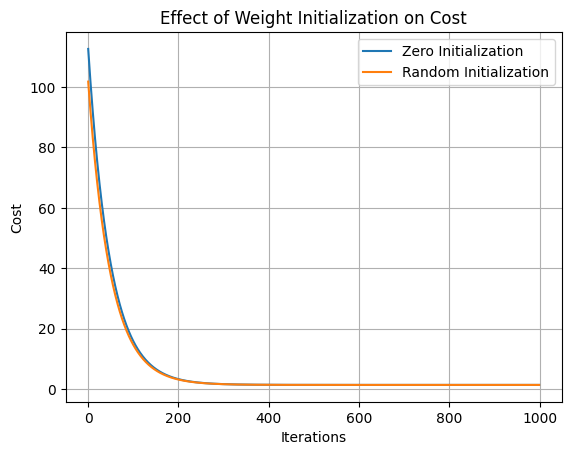

In [72]:
# Zero initialization
weights_zero = initialize_weights(X_train.shape[1])
_, cost_zero = grad_descent(X_train.values, y_train.values, weights_zero, 0.01, 1000)

# Random initialization
weights_random = np.random.uniform(0, 1, X_train.shape[1])
_, cost_random = grad_descent(X_train.values, y_train.values, weights_random, 0.01, 1000)

# Plot comparison
plt.plot(range(len(cost_zero)), cost_zero, label='Zero Initialization')
plt.plot(range(len(cost_random)), cost_random, label='Random Initialization')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Effect of Weight Initialization on Cost')
plt.legend()
plt.grid()
plt.show()


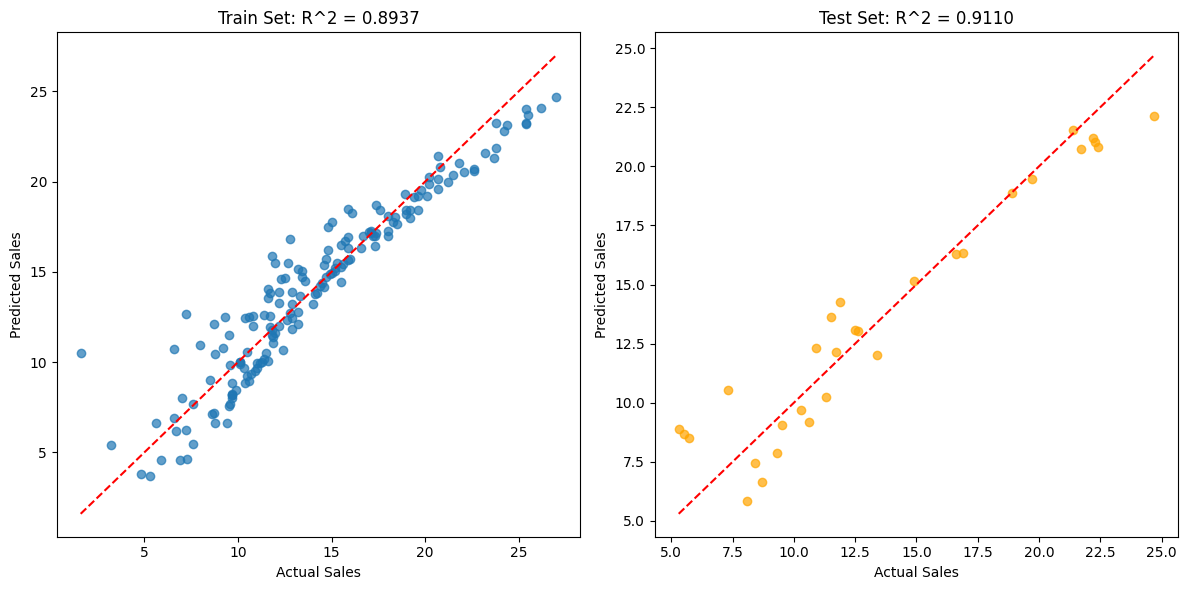

In [73]:
from sklearn.metrics import r2_score

# Predictions for train and test sets
y_train_pred = predict(X_train.values, optimized_weights)
y_test_pred = predict(X_test.values, optimized_weights)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Scatter plot
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title(f'Train Set: R^2 = {r2_train:.4f}')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f'Test Set: R^2 = {r2_test:.4f}')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()


Iteration 0: Cost = 112.5910
Iteration 0: Cost = 112.5910
Iteration 100: Cost = 15.8501
Iteration 200: Cost = 3.3067
Iteration 300: Cost = 1.6527
Iteration 400: Cost = 1.4286
Iteration 0: Cost = 112.5910
Iteration 100: Cost = 15.8501
Iteration 200: Cost = 3.3067
Iteration 300: Cost = 1.6527
Iteration 400: Cost = 1.4286
Iteration 500: Cost = 1.3967
Iteration 600: Cost = 1.3917
Iteration 700: Cost = 1.3907
Iteration 800: Cost = 1.3905
Iteration 900: Cost = 1.3905
Iteration 0: Cost = 112.5910
Iteration 100: Cost = 15.8501
Iteration 200: Cost = 3.3067
Iteration 300: Cost = 1.6527
Iteration 400: Cost = 1.4286
Iteration 500: Cost = 1.3967
Iteration 600: Cost = 1.3917
Iteration 700: Cost = 1.3907
Iteration 800: Cost = 1.3905
Iteration 900: Cost = 1.3905
Iteration 1000: Cost = 1.3905
Iteration 1100: Cost = 1.3905
Iteration 1200: Cost = 1.3905
Iteration 1300: Cost = 1.3905
Iteration 1400: Cost = 1.3905
Iteration 1500: Cost = 1.3905
Iteration 1600: Cost = 1.3905
Iteration 1700: Cost = 1.3905
Ite

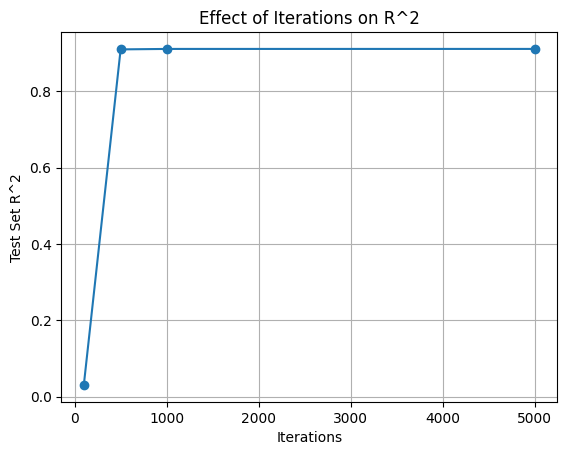

In [74]:
iterations_values = [100, 500, 1000, 5000]
r2_scores = []

for iters in iterations_values:
    weights = initialize_weights(X_train.shape[1])
    optimized_weights, cost_history = grad_descent(X_train.values, y_train.values, weights, 0.01, iters)
    r2_scores.append(r2_score(y_test, predict(X_test.values, optimized_weights)))

plt.plot(iterations_values, r2_scores, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Test Set R^2')
plt.title('Effect of Iterations on R^2')
plt.grid()
plt.show()


In [75]:
ols_model = LinearRegression(fit_intercept=False)
ols_model.fit(X_train, y_train)
ols_weights = ols_model.coef_

# Compare weights
print("Gradient Descent Weights:", optimized_weights)
print("OLS Weights:", ols_weights)

# OLS Performance
y_test_pred_ols = ols_model.predict(X_test)
ols_r2 = r2_score(y_test, y_test_pred_ols)
print("OLS R^2:", ols_r2)

Gradient Descent Weights: [14.02477267  3.83763432  2.79115525  0.01635503]
OLS Weights: [14.02477267  3.83763432  2.79115525  0.01635503]
OLS R^2: 0.9110275702091711
